- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('C:/ds_work/ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [4]:
# 범주형 데이터 변환
df = df.replace({'N':0,'Y':1,'F':0,'M':1, })
gender = {'F': 0, 'M': 1}
oral = {'N': 0, 'T': 1}
tartar = {'N': 0, 'T': 1}
# df 전체 float형으로 바꾸기
df = df.astype(float)

In [7]:
### 기본 특성 데이터프레임 ###

df_basic = df.iloc[:, 1:9]
target = df.loc[:, 'smoking']
# basic

In [8]:
### 간 데이터프레임 ###

df_li = df.iloc[:, 18:20]
liver = pd.concat([df_li, target], axis = 1)
liver

,Urine protein,serum creatinine,smoking
0,1.0,0.7,0.0
1,1.0,0.6,0.0
2,1.0,1.0,1.0
3,1.0,1.0,0.0
4,1.0,0.6,0.0
...,...,...,...
55687,1.0,0.6,0.0
55688,1.0,0.9,0.0
55689,1.0,0.5,0.0
55690,1.0,0.7,0.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)

In [5]:
### 기본 특성 데이터프레임 ###

df_basic = df.iloc[:, 1:9]
target = df.loc[:, 'smoking']
# basic

### 심혈관 및 호흡 데이터프레임 ###

df_bl = df.iloc[:, 10:18]
blood = pd.concat([df_bl, target], axis = 1)
# blood

### 간 데이터프레임 ###

df_li = df.iloc[:, 18:20]
liver = pd.concat([df_li, target], axis = 1)
# liver

### 신장 데이터프레임 ###

df_kid = df.iloc[:, 20:23]
kidney = pd.concat([df_kid, target], axis = 1)
# kidney

### 구강 데이터프레임 ###

df_or = df.iloc[:, 23:26]
oral = pd.concat([df_or, target], axis = 1)
# oral

### 3. 훈련01 : 전체 모델 구현으로 정확도 확인

#### DecisionTreeClassifier

DecisionTreeClassifier()

0.7629948828440614

confusion_matrix : 
 [[5698 1329]
 [1311 2801]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

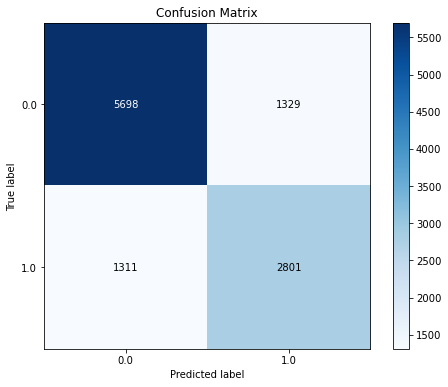

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

#### RandomForestClassifier

RandomForestClassifier()

0.8278121913995871

confusion_matrix : 
 [[5968 1059]
 [ 859 3253]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

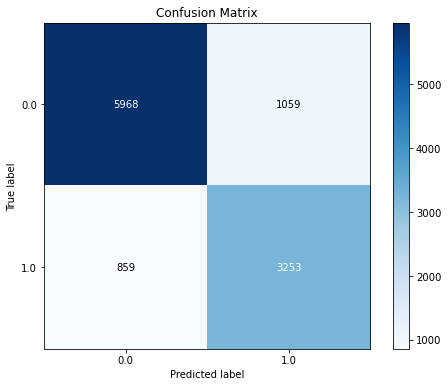

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

### XGBoost

[0]	validation_0-logloss:0.60204
[1]	validation_0-logloss:0.55155
[2]	validation_0-logloss:0.52129
[3]	validation_0-logloss:0.50219
[4]	validation_0-logloss:0.48866
[5]	validation_0-logloss:0.47948
[6]	validation_0-logloss:0.47325
[7]	validation_0-logloss:0.46904
[8]	validation_0-logloss:0.46608
[9]	validation_0-logloss:0.46377
[10]	validation_0-logloss:0.46181
[11]	validation_0-logloss:0.46037
[12]	validation_0-logloss:0.45932
[13]	validation_0-logloss:0.45876
[14]	validation_0-logloss:0.45796
[15]	validation_0-logloss:0.45725
[16]	validation_0-logloss:0.45668
[17]	validation_0-logloss:0.45585
[18]	validation_0-logloss:0.45543
[19]	validation_0-logloss:0.45497
[20]	validation_0-logloss:0.45475
[21]	validation_0-logloss:0.45414
[22]	validation_0-logloss:0.45399
[23]	validation_0-logloss:0.45374
[24]	validation_0-logloss:0.45341
[25]	validation_0-logloss:0.45322
[26]	validation_0-logloss:0.45299
[27]	validation_0-logloss:0.45251
[28]	validation_0-logloss:0.45238
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7782565759942545

confusion_matrix : 
 [[5725 1302]
 [1168 2944]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

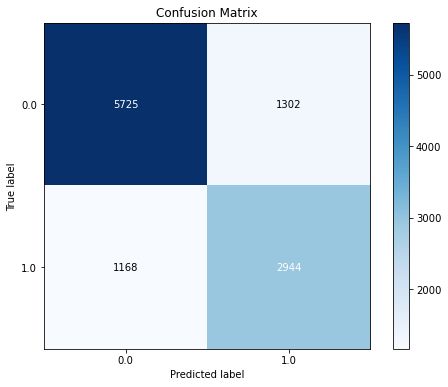

In [9]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

99
0.4427296433494823


0.44272964488104294

array([0.00426044, 0.8394392 , 0.01212047, 0.00586408, 0.00541682,
       0.0057042 , 0.00469223, 0.00379801, 0.00536723, 0.00401257,
       0.00521885, 0.00487424, 0.00482933, 0.00532099, 0.00725594,
       0.00564713, 0.00542283, 0.0054879 , 0.004886  , 0.00651039,
       0.00606318, 0.00651765, 0.01426078, 0.        , 0.0138058 ,
       0.01322366], dtype=float32)

<BarContainer object of 26 artists>

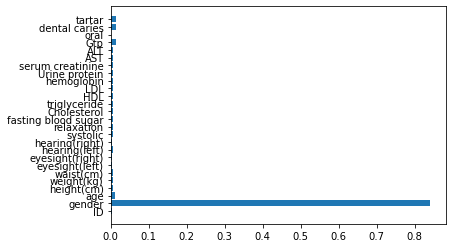

In [10]:
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(df.iloc[:,:-1].columns, model.feature_importances_)

### LGBMClassifier

[1]	valid_0's binary_logloss: 0.629699
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.606
[3]	valid_0's binary_logloss: 0.585945
[4]	valid_0's binary_logloss: 0.569196
[5]	valid_0's binary_logloss: 0.555091
[6]	valid_0's binary_logloss: 0.542841
[7]	valid_0's binary_logloss: 0.532537
[8]	valid_0's binary_logloss: 0.523629
[9]	valid_0's binary_logloss: 0.515708
[10]	valid_0's binary_logloss: 0.509227
[11]	valid_0's binary_logloss: 0.503602
[12]	valid_0's binary_logloss: 0.498581
[13]	valid_0's binary_logloss: 0.494121
[14]	valid_0's binary_logloss: 0.490857
[15]	valid_0's binary_logloss: 0.487633
[16]	valid_0's binary_logloss: 0.48436
[17]	valid_0's binary_logloss: 0.481807
[18]	valid_0's binary_logloss: 0.47944
[19]	valid_0's binary_logloss: 0.477462
[20]	valid_0's binary_logloss: 0.475313
[21]	valid_0's binary_logloss: 0.474085
[22]	valid_0's binary_logloss: 0.472616
[23]	valid_0's binary_logloss: 0.471005
[24]	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7609300655355059

confusion_matrix : 
 [[5559 1468]
 [1195 2917]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

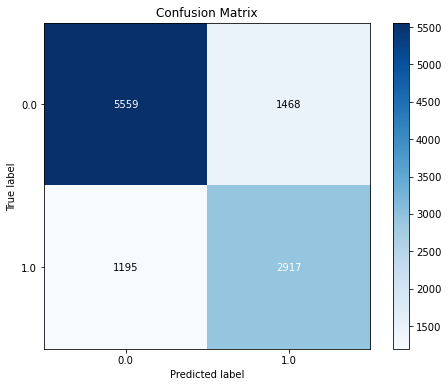

In [11]:
import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

In [12]:
print(model.best_iteration_)
print(model.best_score_)

81
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.4556555797276234)])})


In [13]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.4556555797276236

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

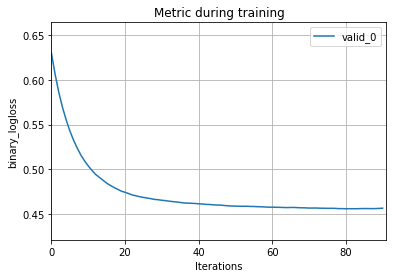

In [14]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

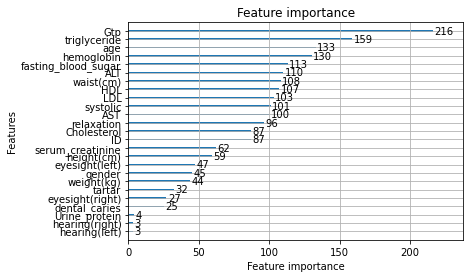

In [15]:
lgb.plot_importance(model)

### Logistic Regression

LogisticRegression(max_iter=10000)

['MINIproject']

0.7075141395098303

0.7075141395098303

confusion_matrix : 
 [[5559 1468]
 [1195 2917]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

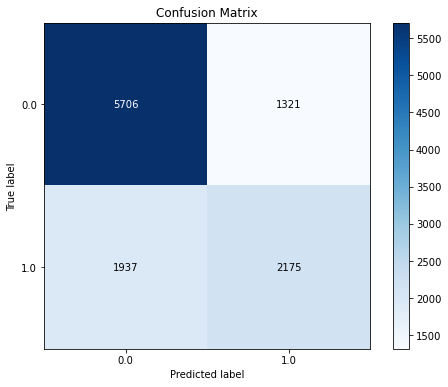

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

import joblib
joblib.dump(model2, 'MINIproject')

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

### Support Vector Machine

SVC()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

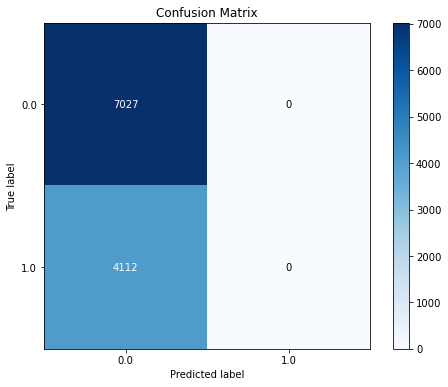

In [17]:
### 모델 - svm ###

from sklearn import svm
from sklearn.metrics import accuracy_score


model = svm.SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

### 4. 훈련02 : 표준화, 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)

print("x_train_std mean :", x_train_std.mean())
print("x_train_std mean :", x_train_std.mean())